# Feature Engineering and Modelling

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
#%plots in jupyter notebook
%matplotlib inline

# set plot style
sns.set(color_codes=True)

In [3]:
df = pd.read_csv(r"C:\Users\hanan\Downloads\data_for_predictions.csv")
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [4]:
df = df.drop(columns='Unnamed: 0')
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [5]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'var_year_price_off_peak_var',
       'var_year_price_peak_var', 'var_year_price_mid_peak_var',
       'var_year_price_off_peak_fix', 'var_year_price_peak_fix',
       'var_year_price_mid_peak_fix', 'var_year_price_off_peak',
       'var_year_price_peak', 'var_year_price_mid_peak',
       'var_6m_price_off_peak_var', 'var_6m_price_peak_var',
       'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix',
       'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix',
       'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak',
       'churn', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_j

df.drop(columns='Unnamed: 0',inplace=True)
df.head()

# Modelling

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [7]:
train = df.copy()

y=df['churn']
x=df.drop(columns=['id','churn'])
print(y.shape)
print(x.shape)

(14606,)
(14606, 61)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42 )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [9]:
y_train.value_counts()

churn
0    9901
1    1053
Name: count, dtype: int64

# Model Training
## XGBOOST
XGBoost (Extreme Gradient Boosting) is an advanced, optimized implementation of gradient boosting — a powerful machine learning technique that builds models in sequence, with each new model focusing on correcting the errors of the previous ones.

"Extreme": Because it’s highly optimized for speed and performance.

"Gradient Boosting": Because it uses gradient descent to minimize the error between predictions and actual values, improving step-by-step.

This makes XGBoost fast, accurate, and widely used for winning machine learning competitions.

### Boosting (vs. Bagging):

While Random Forest uses bagging (parallel trees, combine results), XGBoost uses boosting — building trees sequentially where each new tree learns from the mistakes of the previous ones.

Key idea:
Start with a simple model (a weak learner). Measure its errors. Build a new model to predict and fix those errors. Repeat until performance stops improving or you reach a limit.

Real-life Example:

Imagine teaching a student math: First test → the student makes mistakes. You focus the next lesson only on the topics they got wrong. Next test → fewer mistakes, but still some. You keep adjusting lessons until the student nearly masters the subject.

This is boosting — each "lesson" (tree) focuses on fixing what went wrong before.up gives a different opinion, but combining them gives a more reliable overall result.

### Weak Learners + Voting or Averaging

A weak learner in XGBoost is usually a small decision tree (few splits).

Alone → Not great at predicting.
Sequentially trained → Each one improves upon the last → Strong model.

### Gradient Descent Optimization

XGBoost uses gradients (slopes of the loss function) to decide how to adjust the model.
Think of it like hiking downhill:
You check the steepest direction (gradient).
Take a step in that direction.
Repeat until you reach the lowest point (minimum error).

### Regularization (Why XGBoost is Special)

XGBoost includes L1 and L2 regularization to avoid overfitting.

L1 → Encourages sparsity (simpler models).
L2 → Penalizes overly complex models.

It also uses:
Shrinkage (learning rate) → Slows down each step to improve generalization. Column & row subsampling → Adds randomness for robustness. Handling of missing values → Learns the best direction for missing data during training.

| Concept              | Simple Meaning                                        | Real-life Analogy                                        |
| -------------------- | ----------------------------------------------------- | -------------------------------------------------------- |
| **Boosting**         | Build models one after another, fixing prior mistakes | Tutoring a student by focusing on topics they got wrong  |
| **Gradient Descent** | Use slopes to find minimal error                      | Hiking downhill until you reach the valley               |
| **Regularization**   | Prevent model from memorizing data                    | Teacher gives fewer hints so the student truly learns    |
| **Shrinkage**        | Take smaller steps to avoid mistakes                  | Walk carefully downhill instead of running and stumbling |

### XGBoost Parameters

| Parameter                        | Meaning                                                                                           | Why it matters in your churn model                                                 |
| -------------------------------- | ------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **booster='gbtree'**             | Tells XGBoost to use decision trees as the base learners (other options: `'gblinear'`, `'dart'`). | Trees can capture non-linear patterns in churn behavior better than linear models. |
| **objective='binary\:logistic'** | Specifies this is a binary classification problem, outputting probabilities between 0 and 1.      | Perfect for churn detection where the answer is Yes (1) or No (0).                 |
| **eval\_metric='aucpr'**         | Evaluation metric is **Area Under the Precision-Recall Curve**.                                   | Better than accuracy when classes are imbalanced, like churn datasets.             |
| **scale\_pos\_weight=9.9**       | Tells XGBoost that positive class (churners) is \~9.9 times less frequent than negative class.    | Helps the model pay more attention to churners in imbalanced datasets.             |
| **learning\_rate=0.01**          | How much the model learns in each boosting step (lower = slower but more accurate).               | Small rate reduces overfitting, allowing deeper learning with more rounds.         |
| **max\_depth=10**                | Maximum depth of each tree.                                                                       | Deeper trees can capture more complex patterns, but too deep can overfit.          |
| **gamma=1**                      | Minimum loss reduction required to make a further split in a tree.                                | Higher gamma makes the model more conservative, preventing overfitting.            |
| **subsample=1**                  | Fraction of training samples used per tree (1 = use all samples).                                 | Using less than 1 can prevent overfitting but increases variance.                  |
| **colsample\_bytree=0.8**        | Fraction of features used per tree.                                                               | Encourages diversity among trees, reducing overfitting.                            |
| **n\_estimators=600**            | Number of trees (boosting rounds).                                                                | More trees = more learning, but also slower training.                              |
| **random\_state=42**             | Seed for random number generation.                                                                | Ensures you get the same results every run.                                        |

### Tuning Sheet

| Parameter              | What Happens If You Increase It                             | What Happens If You Decrease It           | Recall Impact Tip                                                                         |
| ---------------------- | ----------------------------------------------------------- | ----------------------------------------- | ----------------------------------------------------------------------------------------- |
| **learning\_rate**     | Model learns faster but risks overfitting.                  | Model learns slower, needs more trees.    | Lower it (e.g., 0.01 → 0.005) and increase `n_estimators` to allow fine-grained learning. |
| **max\_depth**         | Captures more complex patterns, but can overfit.            | Simpler trees, may miss patterns.         | For recall, try slightly higher (e.g., 10 → 12) to catch rare churn signals.              |
| **gamma**              | Model becomes more conservative (splits less often).        | Model splits more easily (risk of noise). | Lower gamma (e.g., 1 → 0.5) to let the model explore more churn patterns.                 |
| **subsample**          | Uses fewer samples per tree → more diversity, less overfit. | Uses all samples, less randomness.        | Keep at 0.8–1, but try 0.9 to keep enough churn cases in each tree.                       |
| **colsample\_bytree**  | Uses fewer features per tree, adds diversity.               | Uses all features per tree.               | Keep around 0.7–0.9 to avoid losing key churn signals.                                    |
| **n\_estimators**      | More trees = more learning (risk of overfit if too high).   | Fewer trees = faster but less accurate.   | Increase (e.g., 600 → 800) if lowering `learning_rate`.                                   |
| **scale\_pos\_weight** | Puts more focus on positives (churners).                    | Less focus on positives.                  | Increase slightly (e.g., 9.9 → 12) to push model to find more churners.                   |
| **booster**            | N/A (tree-based).                                           | N/A                                       | Keep `gbtree` for this use case.                                                          |
| **objective**          | N/A (binary classification).                                | N/A                                       | Keep `binary:logistic`.                                                                   |
| **eval\_metric**       | N/A (evaluation choice).                                    | N/A                                       | Keep `aucpr` for imbalanced recall focus.                                                 |


How Predictions Work

1. First model predicts a rough value.
2.  Calculate the error (residuals) from actual labels.
3. Next tree predicts the residuals (errors).
4. Repeat, adding each prediction with a weight (learning rate).
5. Final prediction = sum of all weak learners’ outputs.


Classification → Output probabilities, then apply a threshold (e.g., 0.5 or tuned value).
Regression → Directly output the summed prediction.

In [48]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(booster='gbtree',
                          objective='binary:logistic', 
                          eval_metric='aucpr', 
                          scale_pos_weight=9.9, 
                          learning_rate=0.01, 
                          max_depth=15, 
                          gamma=1, 
                          subsample=1,   
                          colsample_bytree=0.8,
                          n_estimators=600, 
                          random_state=42 )
xgb_model.fit(X_train, y_train)
y_probs = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.85
y_pred = (y_probs > threshold).astype(int)

y_pred = (y_probs > threshold).astype(int)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display individually
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9066
Precision: 0.9630
Recall: 0.0710


## RANDOM FOREST 

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and merges their results to get a better prediction.

"Random": Because it uses randomness in:
Picking data samples (bootstrap sampling) and Selecting features at each split

"Forest": Because it builds many decision trees, not just one.

“Many weak models (trees that don’t perform well individually) can together make a strong model.”

This idea is based on:

### Bagging (Bootstrap Aggregation):

Randomly take many subsets from your original dataset (with replacement). Train separate models on each of these subsets. Aggregate (combine) their predictions (by averaging or voting).

Real-life Example:
Imagine you want to know the best donut shop in your city.
Instead of asking just one group of friends, you create 10 different friend groups (some friends appear in multiple groups). Ask each group independently. Take a majority vote or average rating to decide the final answer. Each group gives a different opinion, but combining them gives a more reliable overall result.

### Weak Learners + Voting or Averaging

A weak learner is a model that performs just a little better than random guessing.
Alone → Not very strong.
Together → Very powerful!

In Random Forest, each decision tree is a weak learner (built on limited data and features). But when you combine hundreds of them, the overall prediction becomes very accurate.

Voting & Averaging
Classification? → Use voting (majority wins).
Regression? → Use averaging (mean of all predictions).

Real-life Example:
Suppose you ask 10 students a tough math question. Each gives an answer that's maybe 70% correct. But if you combine all their answers smartly, you might get a 95% accurate final answer. That’s many weak learners → one strong decision.

### Central Limit Theorem (CLT)

In statistics, the Central Limit Theorem says:
If you take the average of many samples (even if each sample is noisy or random), the average becomes stable and reliable and tends to follow a normal distribution. Even if each decision tree is a bit inaccurate or noisy, when we average their predictions, we reduce the randomness and get a more stable, reliable output.

Real-life Example:
Suppose you weigh a package on 100 slightly faulty scales. Each scale gives a slightly different weight. But if you take the average of all 100 readings, you'll get very close to the true weight. That’s the Central Limit Theorem in action.

| Concept                    | Simple Meaning                                  | Real-life Analogy                                    |
| -------------------------- | ----------------------------------------------- | ---------------------------------------------------- |
| **Bagging**                | Train many models on random samples             | Ask different groups of friends and combine opinions |
| **Weak Learners + Voting** | Combine not-so-great models to make a great one | 10 average students solving a hard question together |
| **Central Limit Theorem**  | Averaging random results leads to stability     | Weigh a package 100 times and average the result     |

Advantages
| Benefit                                |  Explanation                                     |
| ---------------------------------------- | -------------------------------------------------- |
| **Robust to overfitting**                | Since it averages many trees, variance is reduced. |
| **No feature scaling**                   | No need for normalization or standardization.      |
| **Works well with non-linear data**      | Handles complex, non-linear relationships.         |
| **Handles missing values and imbalance** | Fairly robust in real-world scenarios.             |


Disadvantages
| Limitation              | Explanation                                   |
| ------------------------- | ------------------------------------------------ |
| **Computationally heavy** | Needs to build 100s or 1000s of trees.           |
| **Longer training time**  | Especially with large datasets and many trees.   |
| **Less interpretable**    | Hard to explain why a certain decision was made. |

How Predictions Work
Each tree predicts a class label.
The Random Forest uses:
Majority Voting: For classification (e.g., 7 trees say "Yes", 3 say "No" → final answer is "Yes"), Averaging: For regression (average predicted values)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(  
    class_weight='balanced',
    n_estimators=1000,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_probs = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.6
y_pred = (y_probs > threshold).astype(int)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display individually

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9025
Precision: 0.9167
Recall: 0.0301


## Model Evaluation Metrics

To measure how well it's performing on unseen data. Relying on just accuracy can be misleading, especially when the data is imbalanced. So, we use:
Accuracy, Precision and Recall

Let’s say your model is trying to predict if a patient has a disease (Yes) or not (No).

|                   |  **Predicted: Yes** |  **Predicted: No** |
| ----------------- | --------------------- | -------------------- |
| **Actual: Yes**  | True Positive (TP)    | False Negative (FN)  |
| **Actual: No**  | False Positive (FP)   | True Negative (TN)   |


### Accuracy(Overall correctness)
The percentage of total correct predictions out of all predictions.


                        Accuracy= (TP+TN) / (TP+TN+FP+FN)
 
Good for:
Balanced datasets (similar number of Yes and No cases).

Not good for:
Imbalanced datasets (e.g., 95% "No" and 5% "Yes")

Example:In 1000 patients, only 100 had heart failure. If the model just predicts “No” for everyone:

Accuracy = 900 / 1000 = 90% 
But it missed all real heart failure cases → useless in practice!

### Precision(Correctness of positives) 
Of all the patients predicted to have heart failure, how many actually do?

                              Precision= TP / (TP+FP)
 
High Precision : Fewer false alarms (false positives).
High precision means fewer healthy patients misclassified as sick (so resources aren't wasted).

### Recall (Finding all positives from False Negatives)
Of all the patients who actually had heart failure, how many did the model correctly catch?

                                Recall= TP / (TP+FN)

High Recall : Fewer misses (false negatives)
High recall means fewer sick patients are missed, even if it sometimes over-alerts on healthy people.

### Balance between Precision and Recall
High precision, low recall: Few false alarms, but you might miss real cases.

High recall, low precision: You catch all cases, but you flag many wrongly.

We often need to balance both depending on the use case.

### F1 Score
Harmonic mean of precision and recall

                        F1=2(Precision⋅Recall)/(Precision + Recall)

Used when you want a balance between precision and recall.

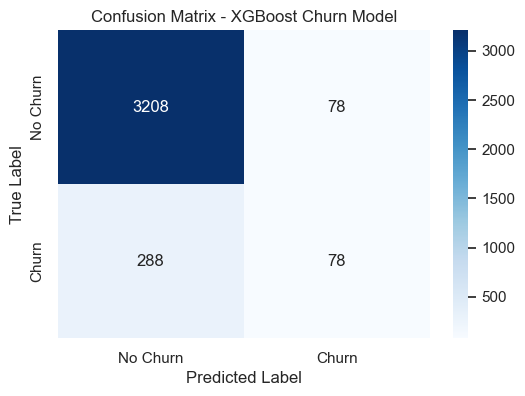

In [47]:
# Confusion Matrix for xgboost
y_pred_xgb = xgb_model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Churn Model')
plt.show()


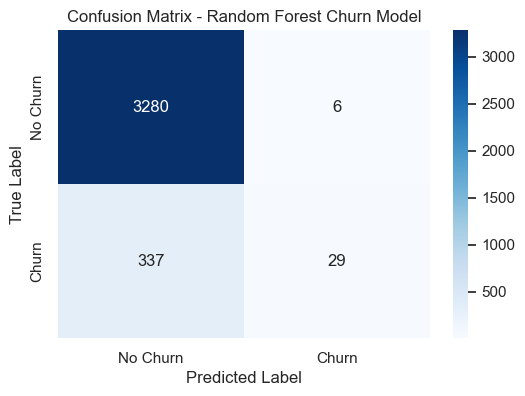

In [37]:
# Confusion Matrix for Random Forest
y_pred_rf = rf_model.predict(X_test) 
cm = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Churn Model')
plt.show()



Within the test set, about 10% of the rows are churners (churn = 1).

True Negatives (TN): We have 3231 out of 3286, meaning that out of all the negative cases (churn = 0), we predicted 3231 correctly as negative. This is excellent performance for identifying non-churners.

False Negatives (FN): This is where we predicted a client would not churn (churn = 0) when in fact they did churn (churn = 1). Here we have 319 cases — this is high and would need to be reduced in future iterations. Reducing FN is critical in churn problems because these are the customers we lose without warning.

False Positives (FP): This is where we predicted churn (churn = 1) when they actually didn’t churn. We have 55 such cases — not terrible, but still something we can try to reduce.

True Positives (TP): In total, there are 366 churners in the test dataset, but we are only able to correctly identify 47 of them. This is quite poor recall and means the model struggles to catch churners.

Accuracy: The overall accuracy will look high because the dataset is imbalanced and the model is very good at predicting the majority class (No Churn). However, accuracy is misleading here — precision and recall are much more informative.

Precision: The precision for predicting churn is likely to be decent (since most predicted churns are correct), but…

Recall: The recall is very poor, meaning the model is missing most churners. This is the main issue to address.

Summary:
The XGBoost model is excellent at identifying non-churners but performs poorly at detecting churners. A large percentage of churners are being classified as non-churners. This suggests that the current feature set may not be sufficiently informative to distinguish churners from non-churners, and that recall-focused improvements (e.g., adjusting the decision threshold, rebalancing the training data, engineering more churn-related features) should be the next step.

# Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model. In the Xgboost case, the feature importance represents the number of times each feature is used for splitting across all trees.

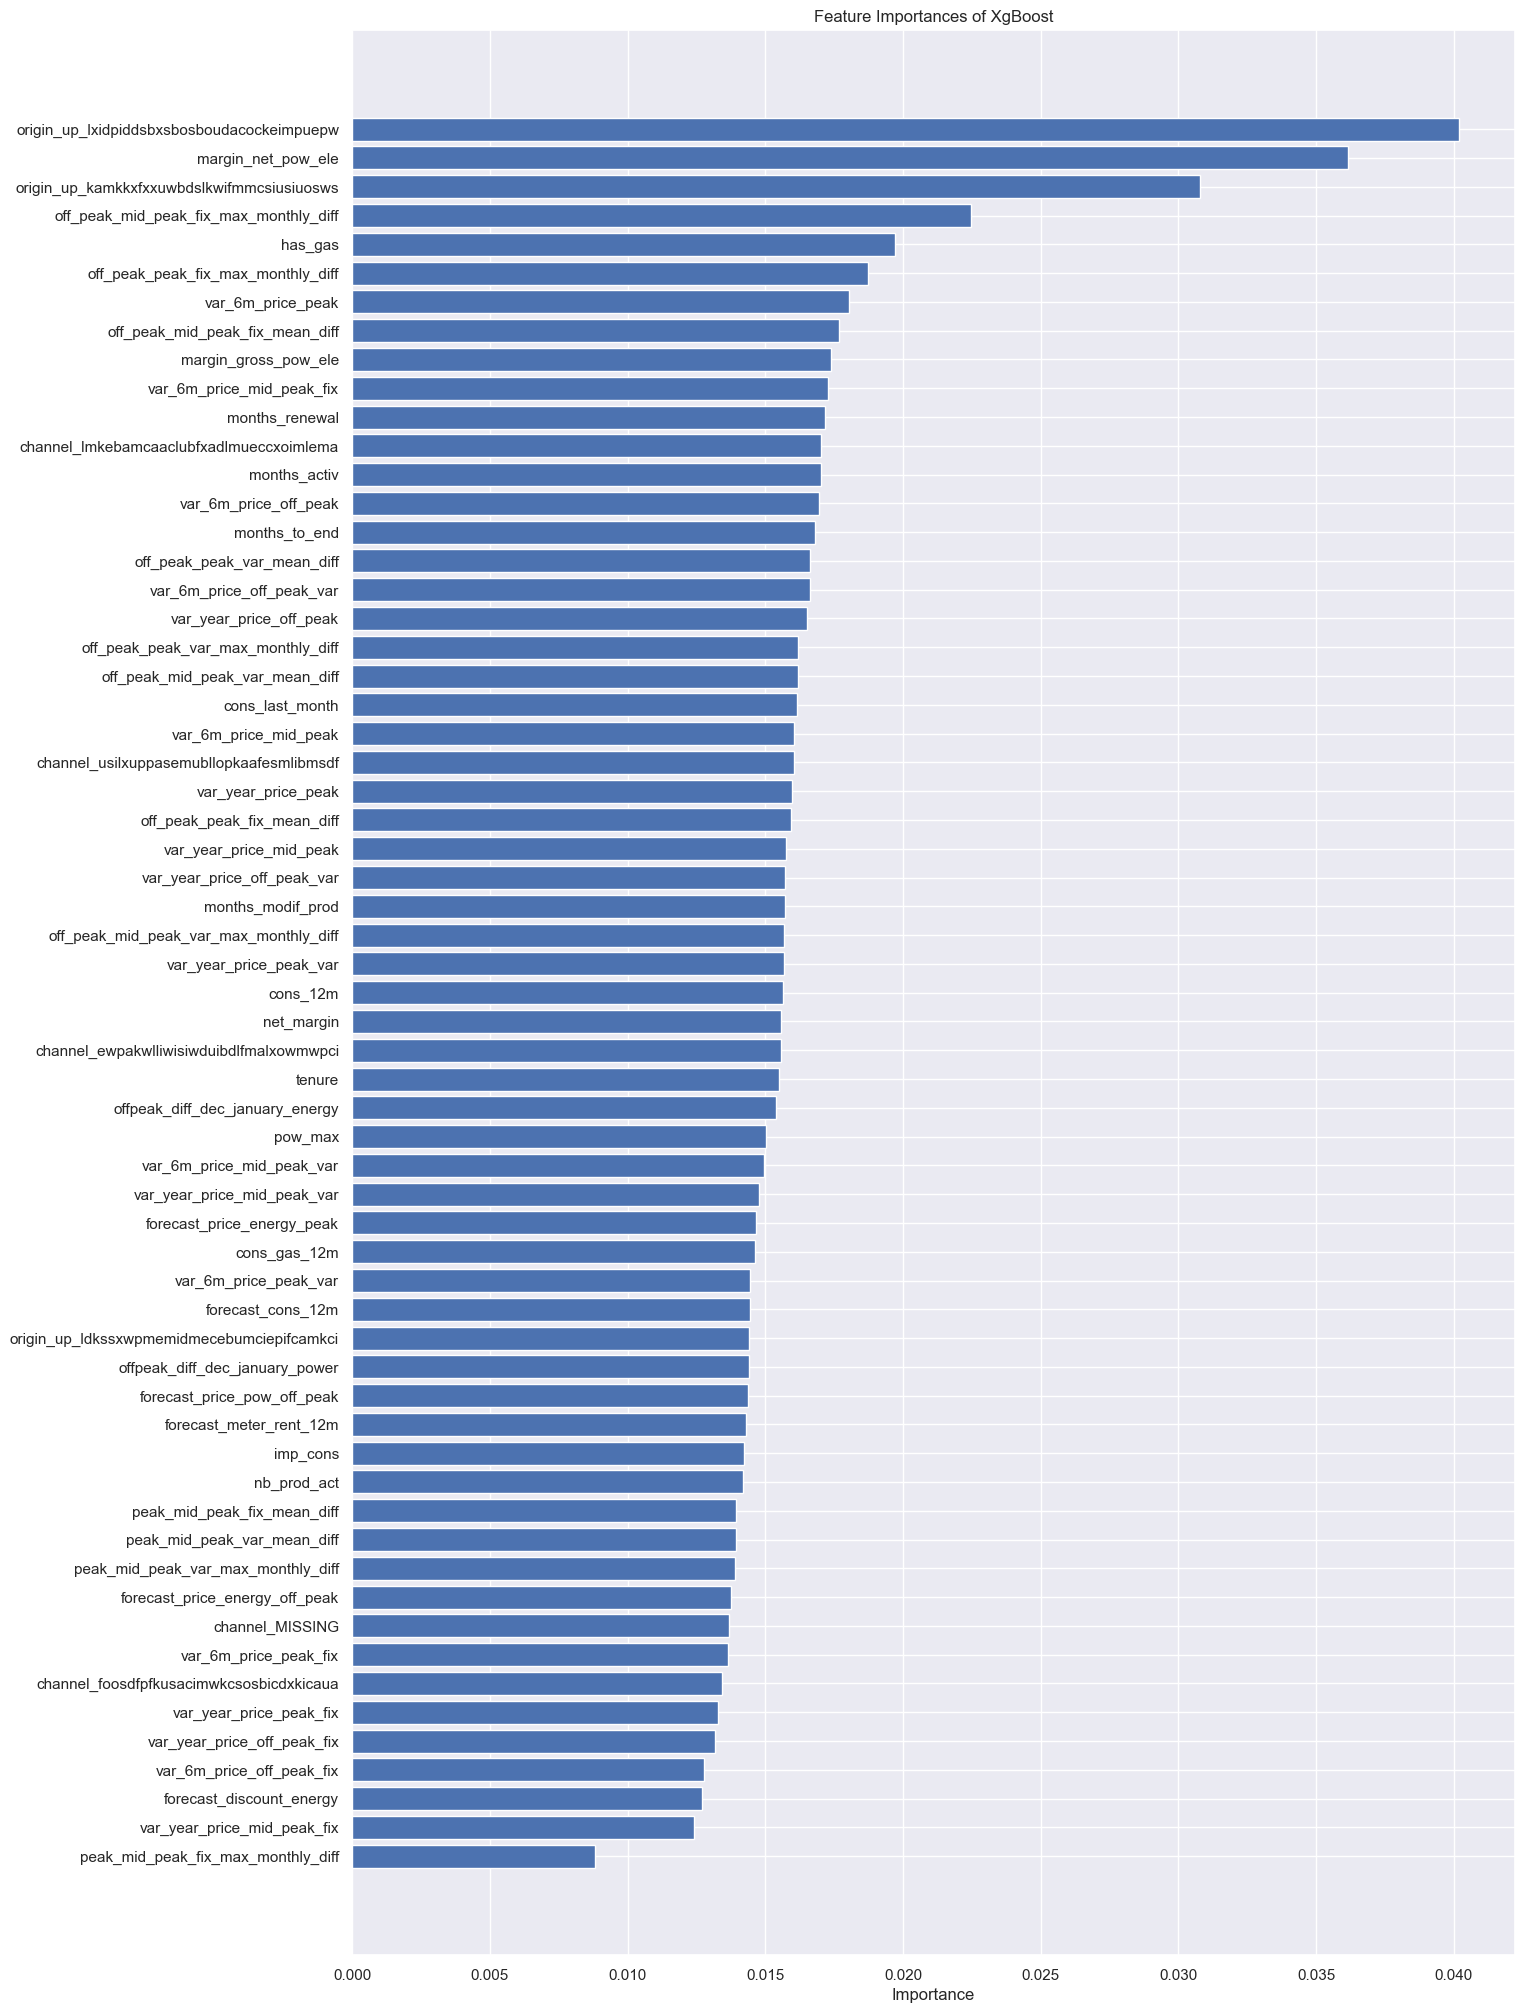

In [14]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance' , ascending = True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances of XgBoost')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

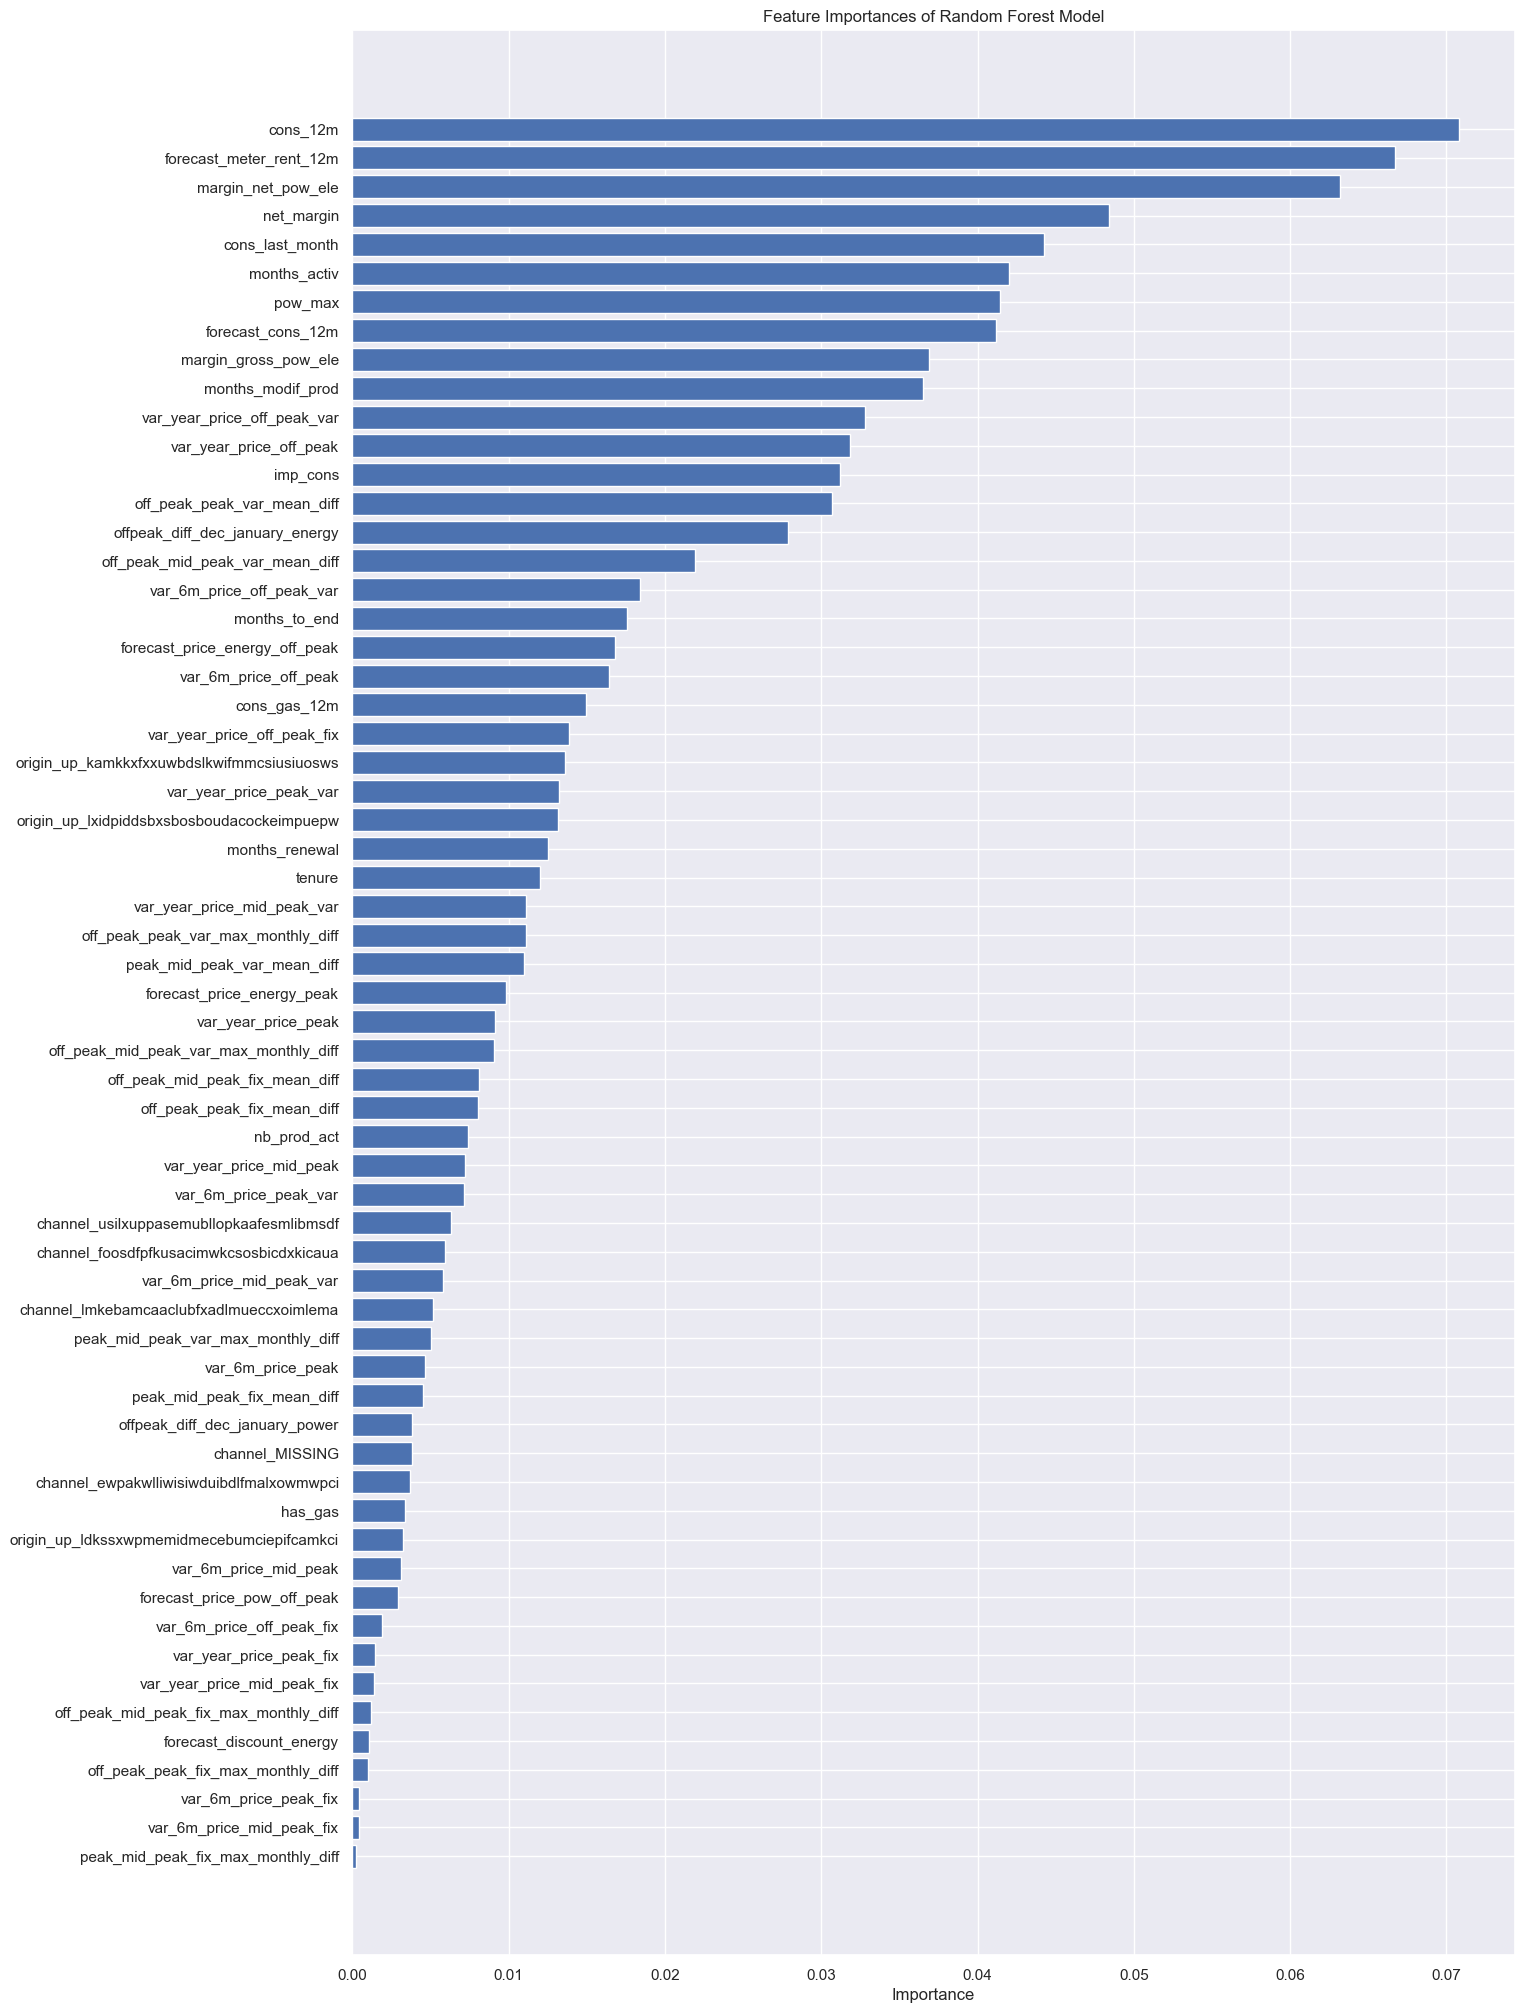

In [15]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance' , ascending = True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances of Random Forest Model')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

# Hybrid Observations – Random Forest vs. XGBoost
### Consumption & Net Margin Dominate
Random Forest: cons_12m, net_margin, and margin_net_pow_ele are the strongest churn indicators, pointing to profitability and annual consumption as key drivers.

XGBoost: Confirms the same dominance but with slightly higher weight given to combined effects of consumption and margin. XGBoost detects more nuanced thresholds where consumption changes cause churn.

Interpretation:
Extreme consumption (very high or low) and profitability margins correlate with dissatisfaction or higher operational costs, leading to churn.

### Contract Behavior & Timing Are Crucial
Random Forest: months_active, months_modif_prod, months_renewal, and tenure show strong influence, signaling loyalty and commitment patterns.

XGBoost: Places equal emphasis but also identifies interaction effects (e.g., how tenure combined with consumption impacts churn probability).

Interpretation:
Time-based behavioral patterns — engagement, contract modifications, renewal proximity — heavily influence churn likelihood.

### Feature Engineering Validated
Random Forest: Engineered price-difference and peak usage variants outperform their raw counterparts but rank mid-tier.

XGBoost: Gives slightly higher importance to engineered interaction features, proving boosted trees leverage derived metrics more effectively.

Interpretation:
Thoughtful feature engineering improves prediction quality for both models, especially for non-linear models like XGBoost.

### Price Sensitivity = Weak Contributor
Random Forest: Price-related features rank in the lower-middle, playing a supporting role.

XGBoost: Same trend, but with better integration into interaction effects (e.g., price × contract length).

Interpretation:
Price changes alone do not drive churn — they matter more when combined with other stressors like low margins or long tenure.

# Hybrid Conclusion
Agreement: Both models pinpoint Consumption, Profitability Margins, and Contract Timing as the dominant churn predictors, with Price Sensitivity playing a secondary role.

Key Difference: XGBoost excels at capturing complex, non-linear relationships and feature interactions, making it better suited for final predictions.

### Purpose
Random Forest can be used for explainability, exploratory analysis, and quick insights.
XGBoost can be used for deployment and production scoring, as it provides higher predictive power and handles nuanced patterns effectively.

In [49]:
proba_predictions = xgb_model.predict_proba(X_test)
probabilities = proba_predictions[:,1]

#### proba_predictions = model.predict_proba(X_test)

This line gets probabilities of each class to 'no' and 'yes'. It returns something like:

                    [[0.87, 0.13],  # 13% chance of churn

                     [0.40, 0.60],  # 60% chance of churn
 
                     [0.01, 0.99]]  # 99% chance of churn

Each row = one customer.
Each column:
First column = probability of NOT churning (class 0)

Second column = probability of churning (class 1)

#### probabilities = proba_predictions[:, 1]

This selects only the second column — the chance that the customer will churn.

                                 [0.13, 0.60, 0.99]

In [50]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

#### X_test = X_test.reset_index()

This resets the index of the test data, just in case it has weird indexes from filtering earlier. Now DataFrame looks like this:

                             index   feature1  feature2  ...
                        0      4        ...       ...
                        1     12        ...       ...
                        2     25        ...       ...

#### X_test.drop(columns='index', inplace=True)

This removes the "index" column you just created, you don't need it anymore.

In [52]:
X_test['churn'] = proba_predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,0,0,1,0,0,0,0,1,"[0.9142921566963196, 0.08570782095193863]",0.085708
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,0,0,1,0,0,0,0,1,"[0.9062047004699707, 0.0937952920794487]",0.093795
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,"[0.8900640606880188, 0.10993591696023941]",0.109936
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,"[0.7955139875411987, 0.20448604226112366]",0.204486
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,0,0,1,0,0,0,1,0,"[0.9238886833190918, 0.0761113315820694]",0.076111


### X_test['churn'] = predictions.tolist()
This adds a new column called "churn".

                            predictions = [0, 1, 1]

                         feature1  feature2  ...  churn
                       0     ...       ...         0
                       1     ...       ...         1
                       2     ...       ...         1
                       
#### X_test['churn_probability'] = probabilities.tolist()

Add actual churn probability we got earlier:

                            probabilities = [0.13, 0.60, 0.99]

                         feature1  feature2  ...  churn  churn_probability
                       0      ...       ...        0            0.13
                       1      ...       ...        1            0.60
                       2      ...       ...        1            0.99


                        